In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Pseudo-population analysis from summary data

In [172]:
#encode the summary data by hand

contain_drop = ['bowl', 'cone', 'dumbbell', 'octahedron', 'pentagon', 'pipe', 'pyramid', 
                'sphere', 'torus', 'trig prism']

contain_target = ['pyramid', 'torus', 'pipe', 'pipe', 'bowl', 'cone', 'torus', 'bowl', 
                   'cone', 'bowl']

contain_alt = ['trig prism', 'octahedron', 'pryamid', 'sphere', 'sphere', 'octahedron', 
               'dumbbell', 'pentagon', 'dumbbell', 'dumbbell']

support_drop = contain_drop[:]

support_target = ['torus', 'trig prism', 'pentagon', 'pentagon', 'pipe', 'torus', 'trig prism',
                  'pipe', 'bowl', 'pentagon']

support_alt = ['trig prism', 'sphere', 'octahedron', 'pyramid', 'pyramid', 'dumbbell', 
               'sphere', 'cone', 'octahedron', 'cone']

contain_fracs = [0.89, 0.89, 0.91, 0.77, 0.71, 0.94, 0.91, 0.94, 0.82, 0.80]

support_fracs = [0.86, 0.53, 0.49, 0.57, 0.69, 0.46, 0.68, 0.89, 0.43, 0.63]

contain_n = [35, 35, 35, 35, 35, 34, 35, 34, 34, 35]

support_n = [35, 34, 35, 35, 35, 35, 34, 35, 35, 35]

types = 10 * ['contain'] + 10 * ['support']

In [173]:
summary_data = zip(*[contain_drop + support_drop, 
                     contain_target + support_target, 
                     contain_alt + support_alt, 
                     contain_fracs + support_fracs, 
                     contain_n + support_n, types])

column_names = ['drop', 'target', 'alt', 'frac', 'n', 'type']

In [174]:
df = pd.DataFrame.from_records(summary_data, index=None, columns=column_names)

In [175]:
df

,drop,target,alt,frac,n,type
0,bowl,pyramid,trig prism,0.89,35,contain
1,cone,torus,octahedron,0.89,35,contain
2,dumbbell,pipe,pryamid,0.91,35,contain
3,octahedron,pipe,sphere,0.77,35,contain
4,pentagon,bowl,sphere,0.71,35,contain
5,pipe,cone,octahedron,0.94,34,contain
6,pyramid,torus,dumbbell,0.91,35,contain
7,sphere,bowl,pentagon,0.94,34,contain
8,torus,cone,dumbbell,0.82,34,contain
9,trig prism,bowl,dumbbell,0.80,35,contain


In [8]:
#create basic functions for split half

def spearman_brown(uncorrected, multiple):
    numerator = multiple * uncorrected
    denominator = 1 + (multiple - 1) * uncorrected
    return numerator / denominator


def idfunc(x):
    return x


def pearsonr(a, b):
    return stats.pearsonr(a, b)[0]


def spearmanr(a, b):
    return stats.spearmanr(a, b)[0]


def split_half_correlation(datas_by_trial,
                           num_splits,
                           aggfunc=idfunc,
                           statfunc=pearsonr):

    """arguments:
              data_by_trial -- list of (numpy arrays) 
                        assumes each is a tensor with structure is (trials, conditions)
              num_splits (nonnegative integer) how many splits of the data to make
    """
        
    random_number_generator = np.random.RandomState(seed=0)

    corrvals = []
    for split_index in range(num_splits):
        stats1 = []
        stats2 = []
        for data in datas_by_trial:
            #get total number of trials
            num_trials = data.shape[0]

            #construct a new permutation of the trial indices
            perm = random_number_generator.permutation(num_trials)

            #take the first num_trials/2 and second num_trials/2 pieces of the data
            first_half_of_trial_indices = perm[:num_trials / 2]
            second_half_of_trial_indices = perm[num_trials / 2: num_trials]

            #mean over trial dimension
            s1 = aggfunc(data[first_half_of_trial_indices].mean(axis=0))
            s2 = aggfunc(data[second_half_of_trial_indices].mean(axis=0))
            stats1.extend(s1)
            stats2.extend(s2)
        
        #compute the correlation between the means
        corrval = statfunc(np.array(stats1), 
                           np.array(stats2))
        #add to the list
        corrvals.append(corrval)
        
    return spearman_brown(np.array(corrvals), 2)

In [9]:
#compute curve of split halfs as a function of pseudo-population size
rng = np.random.RandomState(seed=0)
corrvals_mean = []
corrvals_std = []
rvals = range(10, 200)
for k in rvals:
    samples = np.array([rng.binomial(1, df['frac']) for i in range(k)])
    corrs = split_half_correlation([samples], 1000)
    corrval_mean = corrs.mean()
    corrval_std = corrs.std()
    corrvals_mean.append(corrval_mean)
    corrvals_std.append(corrval_std)
corrvals_mean = np.array(corrvals_mean)
corrvals_std = np.array(corrvals_std)

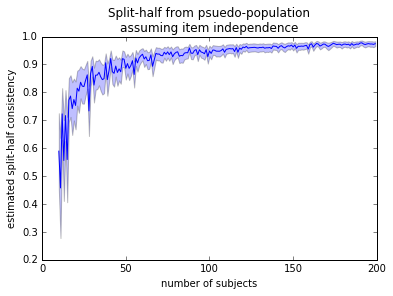

In [10]:
#plot results

plt.plot(rvals, corrvals_mean)
cp = corrvals_mean + corrvals_std
cm = corrvals_mean - corrvals_std
plt.fill_between(rvals, cm, cp, alpha=0.25)
plt.xlabel("number of subjects")
plt.ylabel("estimated split-half consistency")
plt.title('Split-half from psuedo-population\nassuming item independence')

## Real subject-level data analysis

In [ ]:
##now lets do split-half analysis on object data matrixx

In [18]:
subjdata = pd.read_csv('exp2_cleaned.csv')

In [24]:
subjdata

,Unnamed: 0,Study,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,SC0,Exclude,Torus0,...,Torus.1,Dumbbell.1,Cone.1,Pipe.1,Trig Prism.1,Pentagon.1,Pyramid.1,Octahedron.1,Sphere.1,Bowl.1
0,4,1a,100,Duration,True,4/4/20 11:05,R_3JyoUNfbSDABc94,4,NaN,dumbbell,...,octahedron,octahedron,trig prism,dumbbell,pentagon,pipe,trig prism,pentagon,pipe,torus
1,5,1a,100,Duration,True,4/4/20 11:07,R_1CvwRhMapUomBsC,4,NaN,dumbbell,...,bowl,octahedron,sphere,torus,pentagon,pipe,sphere,pentagon,pipe,torus
2,6,1a,100,Duration,True,4/4/20 11:13,R_1dLEUALXTCXPYwg,4,NaN,dumbbell,...,bowl,octahedron,sphere,dumbbell,pentagon,pipe,trig prism,pentagon,pipe,torus
3,7,1a,100,Duration,True,4/4/20 11:51,R_3jfhjDRHGmo9KTg,4,NaN,dumbbell,...,bowl,octahedron,trig prism,torus,pentagon,pipe,trig prism,pentagon,pipe,torus
4,8,1a,100,Duration,True,4/4/20 12:21,R_x6geSt6x2c7PZK1,4,NaN,dumbbell,...,bowl,pentagon,trig prism,dumbbell,pentagon,pipe,trig prism,pentagon,pipe,torus
5,9,1a,100,Duration,True,4/4/20 16:44,R_2Qmr3gBwfUgdSlH,3,NaN,dumbbell,...,bowl,octahedron,sphere,dumbbell,pentagon,pyramid,sphere,pyramid,cone,torus
6,10,1a,100,Duration,True,4/4/20 17:07,R_3M4OB4WgEY8KuIb,4,NaN,dumbbell,...,octahedron,pentagon,sphere,torus,cone,pyramid,sphere,pentagon,pipe,trig prism
7,11,1a,100,Duration,True,4/4/20 17:40,R_2TYsi9Jyy5kzQsY,4,NaN,dumbbell,...,bowl,octahedron,trig prism,torus,pentagon,pipe,trig prism,pyramid,pipe,torus
8,12,1a,100,Duration,True,4/4/20 18:40,R_p0jaMGj1VSKi1O1,4,NaN,dumbbell,...,octahedron,octahedron,trig prism,torus,cone,pyramid,trig prism,pentagon,pipe,trig prism
9,13,1a,100,Duration,True,4/4/20 22:00,R_3D0DclwZTHZrrQW,4,NaN,dumbbell,...,bowl,octahedron,trig prism,dumbbell,pentagon,pipe,sphere,pyramid,pipe,torus


In [25]:
#there were 44 subjects
len(subjdata)

44

In [26]:
#but we want to exclude the ones who didn't finish
subjdata_keep = subjdata[subjdata['Exclude'] != 'Y']

In [27]:
#... leaving 35 (with a few missing trials)
len(subjdata_keep)

35

In [28]:
subjdata_keep.columns

Index([u'Unnamed: 0', u'Study', u'Progress', u'Duration (in seconds)',
       u'Finished', u'RecordedDate', u'ResponseId', u'SC0', u'Exclude',
       u'Torus0', u'Dumbbell', u'Pipe', u'Torus', u'Bowl', u'Octahedron',
       u'Sphere', u'Pentagon', u'Trig Prism', u'Cone', u'Pyramid', u'Torus.1',
       u'Dumbbell.1', u'Cone.1', u'Pipe.1', u'Trig Prism.1', u'Pentagon.1',
       u'Pyramid.1', u'Octahedron.1', u'Sphere.1', u'Bowl.1'],
      dtype='object')

In [33]:
datacols = subjdata_keep.columns[-20:]

In [34]:
datacols

Index([u'Dumbbell', u'Pipe', u'Torus', u'Bowl', u'Octahedron', u'Sphere',
       u'Pentagon', u'Trig Prism', u'Cone', u'Pyramid', u'Torus.1',
       u'Dumbbell.1', u'Cone.1', u'Pipe.1', u'Trig Prism.1', u'Pentagon.1',
       u'Pyramid.1', u'Octahedron.1', u'Sphere.1', u'Bowl.1'],
      dtype='object')

In [37]:
contain_drop

['bowl',
 'cone',
 'dumbbell',
 'octahdron',
 'pentagon',
 'pipe',
 'pyramid',
 'sphere',
 'torus',
 'trig prism']

In [57]:
#make sure the data is in the same order as the summary

datacols_reordered = [[_k for _k in datacols if not _k.endswith('.1') and _k.lower() == k][0] for k in contain_drop] + \
                     [[_k for _k in datacols if _k.endswith('.1') and _k[:-2].lower() == k][0] for k in contain_drop]

In [58]:
datacols_reordered

['Bowl',
 'Cone',
 'Dumbbell',
 'Octahedron',
 'Pentagon',
 'Pipe',
 'Pyramid',
 'Sphere',
 'Torus',
 'Trig Prism',
 'Bowl.1',
 'Cone.1',
 'Dumbbell.1',
 'Octahedron.1',
 'Pentagon.1',
 'Pipe.1',
 'Pyramid.1',
 'Sphere.1',
 'Torus.1',
 'Trig Prism.1']

In [145]:
datamat = subjdata_keep[datacols_reordered]
datamat

,Bowl,Cone,Dumbbell,Octahedron,Pentagon,Pipe,Pyramid,Sphere,Torus,Trig Prism,Bowl.1,Cone.1,Dumbbell.1,Octahedron.1,Pentagon.1,Pipe.1,Pyramid.1,Sphere.1,Torus.1,Trig Prism.1
0,pyramid,torus,pipe,pipe,bowl,cone,torus,bowl,cone,bowl,torus,trig prism,octahedron,pentagon,pipe,dumbbell,trig prism,pipe,octahedron,pentagon
1,trig prism,torus,pipe,pipe,bowl,octahedron,torus,bowl,dumbbell,bowl,torus,sphere,octahedron,pentagon,pipe,torus,sphere,pipe,bowl,pentagon
2,trig prism,torus,pipe,sphere,sphere,cone,torus,bowl,cone,bowl,torus,sphere,octahedron,pentagon,pipe,dumbbell,trig prism,pipe,bowl,pentagon
3,pyramid,torus,pipe,pipe,bowl,cone,torus,bowl,cone,bowl,torus,trig prism,octahedron,pentagon,pipe,torus,trig prism,pipe,bowl,pentagon
4,pyramid,torus,pipe,pipe,bowl,cone,torus,bowl,cone,bowl,torus,trig prism,pentagon,pentagon,pipe,dumbbell,trig prism,pipe,bowl,pentagon
5,trig prism,torus,pipe,sphere,bowl,cone,torus,pentagon,cone,bowl,torus,sphere,octahedron,pyramid,pyramid,dumbbell,sphere,cone,bowl,pentagon
6,pyramid,torus,pipe,pipe,sphere,cone,torus,bowl,cone,bowl,trig prism,sphere,pentagon,pentagon,pyramid,torus,sphere,pipe,octahedron,cone
7,pyramid,torus,pipe,pipe,bowl,cone,torus,bowl,cone,bowl,torus,trig prism,octahedron,pyramid,pipe,torus,trig prism,pipe,bowl,pentagon
8,pyramid,octahedron,pipe,pipe,bowl,cone,torus,bowl,cone,bowl,trig prism,trig prism,octahedron,pentagon,pyramid,torus,trig prism,pipe,octahedron,cone
9,pyramid,torus,pipe,pipe,sphere,cone,torus,bowl,dumbbell,dumbbell,torus,trig prism,octahedron,pyramid,pipe,dumbbell,sphere,pipe,bowl,pentagon


In [176]:
#ok, now we're going to 

Ns = []
num_data = []
for k_ind, k in enumerate(datamat.columns):
    col = np.asarray(datamat[k], dtype=np.str)
    col_notnan = col[col != 'nan']
    n = len(col_notnan)
    Ns.append(n)
    
    colf = np.zeros(col.shape, dtype=np.float)
    colf[col == df['target'][k_ind]] = 1
    colf[col == 'nan'] = np.nan
    
    num_data.append(colf)
    
num_data = np.array(num_data).T

In [177]:
mask = np.isnan(num_data)

In [178]:
num_data_masked = np.ma.masked_array(num_data, mask)

In [179]:
num_data_masked.shape

(35, 20)

In [180]:
#time for a sanity check -- are our summaries the same as Sama's?
real_vec = num_data_masked.mean(0)
real_vec

masked_array(data=[0.8857142857142857, 0.8857142857142857,
                   0.9142857142857143, 0.7714285714285715,
                   0.7142857142857143, 0.9411764705882353,
                   0.9142857142857143, 0.9411764705882353,
                   0.8235294117647058, 0.8, 0.8571428571428571,
                   0.5294117647058824, 0.4857142857142857,
                   0.5714285714285714, 0.6857142857142857,
                   0.45714285714285713, 0.6764705882352942,
                   0.8857142857142857, 0.42857142857142855,
                   0.6285714285714286],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=1e+20)

In [183]:
#we should expect the rounding-off of the real_vec to 2 decimals to
#coincide with what Sama summarized
np.round(real_vec, decimals=2) - df['frac']
#Yep!!

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: frac, dtype: float64

In [184]:
subjdata_corrs = split_half_correlation([num_data_masked], 1000)
subjdata_corrs_mean = subjdata_corrs.mean()
subjdata_corrs_std = subjdata_corrs.std()

'Actual subject split half: %.3f +/- %.3f' % (subjdata_corrs_mean, subjdata_corrs_std)

'Actual subject split half: 0.880 +/- 0.044'

In [186]:
#compare to what we found from the summary-model at the same number of trials
rel_ind = rvals.index(35)
'Split-half from summaries: %.3f +/- %.3f' % (corrvals_mean[rel_ind], corrvals_std[rel_ind])
#pretty similar

'Split-half from summaries: 0.856 +/- 0.051'

## Comparing two "models"

In [187]:
#now we'll compare two "models" -- the data itself, to the population summary vectors

In [198]:
#create a popuation summary vector (that is, "sample" from the summary model)
#assuming 35 trials (the same size as the real data)
rng1 = np.random.RandomState(seed = 0)
summary_samples = np.array([rng1.binomial(1, df['frac']) for i in range(100)])
sample_corr_mean = split_half_correlation([summary_samples], 1000).mean()

In [196]:
summary_samples.shape

(100, 20)

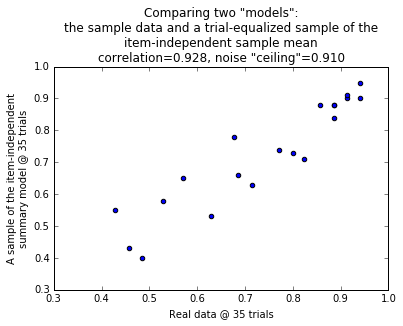

In [199]:
#now create the actual data mean estimate by averaging over trials
#... for the real data
real_vec = num_data_masked.mean(0)
#... and for the summary data
summary_vec = summary_samples.mean(0)

#compare them visually
plt.scatter(real_vec, summary_vec)
plt.xlabel('Real data @ 35 trials')
plt.ylabel('A sample of the item-independent\nsummary model @ 35 trials')

#and compare them formally
numerator = stats.pearsonr(real_vec, summary_vec)[0] 
denominator = np.sqrt(subjdata_corrs_mean * sample_corr_mean)
numerator, denominator

plt.title('Comparing two "models":\nthe sample data and a trial-equalized sample of the\nitem-independent sample mean\ncorrelation=%.3f, noise "ceiling"=%.3f' % (numerator, denominator))

In [191]:
#conclusion: as we know it must be, the sample mean is actually a good model of the 
#mean of the population -- in fact, slightly *better* than Spearman-brown suggests

In [ ]:
#Q: here we use correlation between vectors as the metric of similarity.  Should we be using 
#l2 distance, corresponding to "good